In [1]:
using DelimitedFiles
using Plots

In [2]:
function analytical_psi(t, x)
    return sin(2 * pi * (x - t))
end

analytical_psi (generic function with 1 method)

In [3]:
parent_dir =  "/Users/liwei/docker-workspace/simulations/"

"/Users/liwei/docker-workspace/simulations/"

## 2 Levels with Mongwane's Subcycling

In [4]:
dirs = [
    "scalarwave_2levels_nx100_Mongwane",
    "scalarwave_2levels_nx200_Mongwane",
    "scalarwave_2levels_nx400_Mongwane"
]
nxs = [100, 200, 400]
nxas = nxs .+ 6

3-element Vector{Int64}:
 106
 206
 406

### level 1 (3-th order covergent)

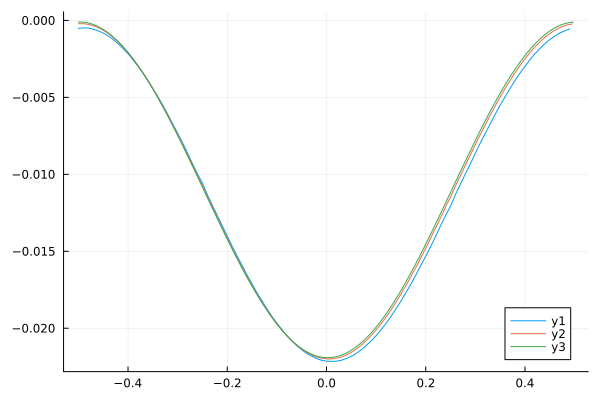

In [8]:
dxs = [0.01, 0.005, 0.0025]
lev = 1
tmax = 1.0
cord = 1.0
plt = plot()
for i in 1:length(dirs)
    fulldir = parent_dir * dirs[i]
    tsv_files = filter(f -> endswith(f, ".tsv"), readdir(fulldir))
    for fname in tsv_files
        data = readdlm(joinpath(fulldir, fname), Float64, comments = true)
        if abs(data[1, 2] - tmax) < 1e-12
            x = data[findall(x -> x == lev, data[:, 3]), 5][1+3:nxas[i]-3]
            psi = data[findall(x -> x == lev, data[:, 3]), 6][1+3:nxas[i]-3]
            error = (psi - analytical_psi.(tmax, x)) * dxs[i]^(-cord)
            plt = plot!(x, error)
        end
    end
end
display(plt)

### level 2 (3-th order covergent)

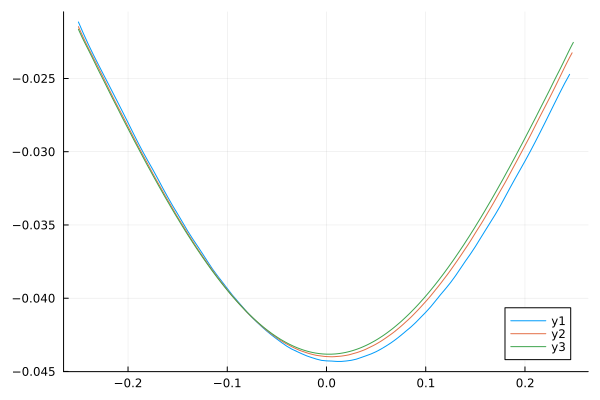

In [9]:
dxs = [0.005, 0.0025, 0.00125]
lev = 2
tmax = 1.0
cord = 1.0
plt = plot()
for i in 1:length(dirs)
    fulldir = parent_dir * dirs[i]
    tsv_files = filter(f -> endswith(f, ".tsv"), readdir(fulldir))
    for fname in tsv_files
        data = readdlm(joinpath(fulldir, fname), Float64, comments = true)
        if abs(data[1, 2] - tmax) < 1e-12
            x = data[findall(x -> x == lev, data[:, 3]), 5][1+3:nxas[i]-3]
            psi = data[findall(x -> x == lev, data[:, 3]), 6][1+3:nxas[i]-3]
            error = (psi - analytical_psi.(tmax, x)) * dxs[i]^(-cord)
            plt = plot!(x, error)
        end
    end
end
display(plt)